# FOR HAM / SPAM

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string as st
print('Imported Successfully')

Imported Successfully


In [2]:
# Reading the data and storing it in the dataframe(from pandas)
df = pd.read_csv('EDI_DATASET.csv')
print('CSV opened and read successfully')

CSV opened and read successfully


## Stages of the Projects
#### 1. Dataset Creation / Data Cleaning
#### 2. EDA(Exploratory Data Analysis) - Basically Visualizing the dataset
#### 3. Text Preprocessing - Tokenisation, Vectorisation
#### 4. Model Building (Naive Bayes Algorithm)
#### 5. Model Evaluation (ACcuracy)
#### 6. Improvements / Comparitive Analysis
#### 7. Deploy in website form

### Stage 1. About Data and Preprocessing the data(understanding the data)

In [3]:
df.sample(5)

,spam(1)/ham(0),"class(type of the emai)(0: finance,1 : operations, 2: advertisement, 3: cust_supp, 4: hr)",body(message),"Overall tone of the mail (0: Happy, 1: Neutral, 2: Enquiry, 3: Complaint)","Priority(0: low, 1: medium, 2: high)"
159,Spam,hr,Earn your degree in 6 months! No exams required.,Happy,Low
779,Spam,advertisement,Attention all beauty lovers! Enjoy 30% off on ...,Happy,High
523,Spam,finance,Urgent: Your account password has been comprom...,Complaint,High
583,Spam,finance,Your account security is at risk! Click here t...,Complaint,High
321,Ham,advertisement,"Hi Team, The market analysis report is attache...",Neutral,Medium


In [4]:
df.shape

(814, 5)

In [8]:
# Renaming the columns
df.rename(columns = {'spam(1)/ham(0)':'target', 'class(type of the emai)(0: finance,1 : operations, 2: advertisement, 3: cust_supp, 4: hr)' : 'class', 'body(message)' : 'body', 'Overall tone of the mail (0: Happy, 1: Neutral, 2: Enquiry, 3: Complaint)' : 'tone', 'Priority(0: low, 1: medium, 2: high)' : 'priority'}, inplace=True)
print('Columns Renamed')

Columns Renamed


In [9]:
# drop the unnecesary columns wrt to ham/spam
df.drop(columns=['class', 'tone', 'priority'], inplace=True)

In [10]:
df.sample(8)

,target,body
704,Spam,Attention: Your account has been flagged for s...
513,Ham,"Dear Team, We have finalized the marketing mat..."
716,Spam,Urgent: Your account has been compromised. Cli...
244,Ham,Our annual training session on workplace safet...
112,Spam,Start your hr certification for free!
703,Ham,"Hi Everyone, Just a friendly reminder to revie..."
19,Ham,Thank you for your feedback. We are looking in...
784,Spam,Upgrade your wardrobe with our latest fashion ...


In [11]:
# Importing the library
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
print('Imported the Label encoder from Sci-kit learn Library')

Imported the Label encoder from Sci-kit learn Library


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  814 non-null    object
 1   body    814 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB


#### Encoding the columns of the dataset

In [13]:
df['target'] = encoder.fit_transform(df['target'])
print('Encoded the target column of the dataset')

Encoded the target column of the dataset


In [14]:
df.sample(20)

,target,body
546,1,Urgent: Your account has been compromised. Cli...
184,0,The scheduled maintenance will take place this...
534,0,"Team, The cafeteria will be closed for renovat..."
31,1,Alert: Your credit score has been updated. Cli...
725,0,"Dear Customer, We understand the urgency of yo..."
101,0,Please find attached the financial summary for...
551,0,"Team, The scheduled maintenance of the parking..."
168,0,Don't forget to submit your annual performance...
79,0,Your support ticket has been closed. Please co...
753,0,"Dear Customer, We apologize for the inconvenie..."


In [15]:
# check for missing values
df.isnull().sum()

target    0
body      0
dtype: int64

In [16]:
# check for duplicates
df.duplicated().sum()

186

In [17]:
# delete the duplicate entries
df = df.drop_duplicates(keep='first')
print('Removed the Duplicates but kept the first ones')

Removed the Duplicates but kept the first ones


In [18]:
# check for duplicates again
df.duplicated().sum()

0

### Stage 2: EDA (Exploratory Data analysis)

In [19]:
df.sample(8)

,target,body
261,1,Claim your free gift card by participating in ...
479,0,"Dear Customer, Thank you for contacting us. We..."
386,0,"Dear Team, The attached report contains the re..."
633,1,Attention: Your account has been flagged for s...
23,1,Final notice: Pay your overdue bill to avoid l...
65,0,The next staff meeting is scheduled for Monday...
42,0,Kindly send the tax documents for the last fis...
181,0,Your replacement item has been shipped. You ca...


In [20]:
# count the different types of the target in the dataset
df['target'].value_counts()

target
0    458
1    170
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

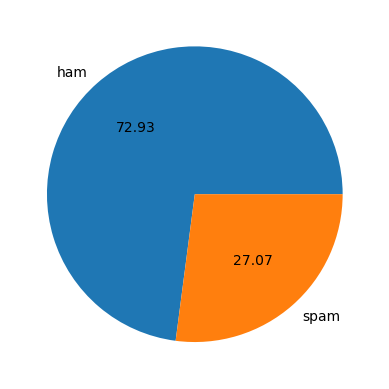

In [21]:
# pie chart of the classes
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct= '%0.2f')
plt.show

##### Data is fairly imbalanced

### Analysis Using NLTK (Natural Language Toolkit)

In [22]:
#using nltk library for further analysis
nltk.download('punkt')
print("Dependencies downloaded Successfully")

Dependencies downloaded Successfully


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bahad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Now We will add 3 more columns to the dataframe
##### 1. No. of characters of the message
##### 2. No. of words of the message
##### 2. No. of sentences of the message

In [23]:
# counting no. of characters
df['char_no'] = df['body'].apply(len)
print('No. of Character Column added.')

No. of Character Column added.


C:\Users\bahad\AppData\Local\Temp\ipykernel_21720\1587176848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_no'] = df['body'].apply(len)


In [24]:
# counting no of words
df['word_no'] = df['body'].apply(lambda x:len(nltk.word_tokenize(x)))
print('No. of Words Column added.')

No. of Words Column added.


C:\Users\bahad\AppData\Local\Temp\ipykernel_21720\1538915441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_no'] = df['body'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
# counting the no of sentences
df['sent_no'] = df['body'].apply(lambda x: len(nltk.sent_tokenize(x)))
print('No. of Sentences Column Added')

No. of Sentences Column Added


C:\Users\bahad\AppData\Local\Temp\ipykernel_21720\2244188809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_no'] = df['body'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [26]:
df.head()

,target,body,char_no,word_no,sent_no
0,0,"Dear John, please find attached the quarterly ...",74,13,1
1,1,Congratulations! You've won a free trip to the...,87,19,3
2,0,"Hi, I am having trouble with my account login....",69,16,2
3,0,Please join us in welcoming our new team membe...,77,17,1
4,1,Urgent: Your bank account has been compromised...,80,14,2


In [27]:
# analysis on new 3 columns
df[['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,628.00000,628.000000,628.000000
mean,125.72293,23.453822,2.487261
std,53.99341,9.946240,0.964190
min,37.00000,7.000000,1.000000
25%,84.00000,16.000000,2.000000
50%,120.00000,22.000000,2.000000
75%,152.25000,28.000000,3.000000
max,432.00000,77.000000,7.000000


In [28]:
#analysis of each class of the message, class 0 
df[df['target'] == 0][['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,458.000000,458.000000,458.000000
mean,134.024017,24.984716,2.635371
std,52.883728,9.727006,0.976874
min,49.000000,8.000000,1.000000
25%,86.000000,17.000000,2.000000
50%,135.500000,25.000000,3.000000
75%,162.000000,30.000000,3.000000
max,343.000000,63.000000,6.000000


In [29]:
#analysis of each class of the message, class 1 
df[df['target'] == 1][['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,170.000000,170.000000,170.000000
mean,103.358824,19.329412,2.088235
std,50.629944,9.365540,0.805589
min,37.000000,7.000000,1.000000
25%,76.000000,14.000000,2.000000
50%,99.000000,18.000000,2.000000
75%,114.000000,21.000000,2.000000
max,432.000000,77.000000,7.000000


In [30]:
# visual analysis with the help of seaborn library
sns.histplot(df[df['class'] == 0]['word_no'])
sns.histplot(df[df['class'] == 1]['word_no'], color='red')

KeyError: 'class'

C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


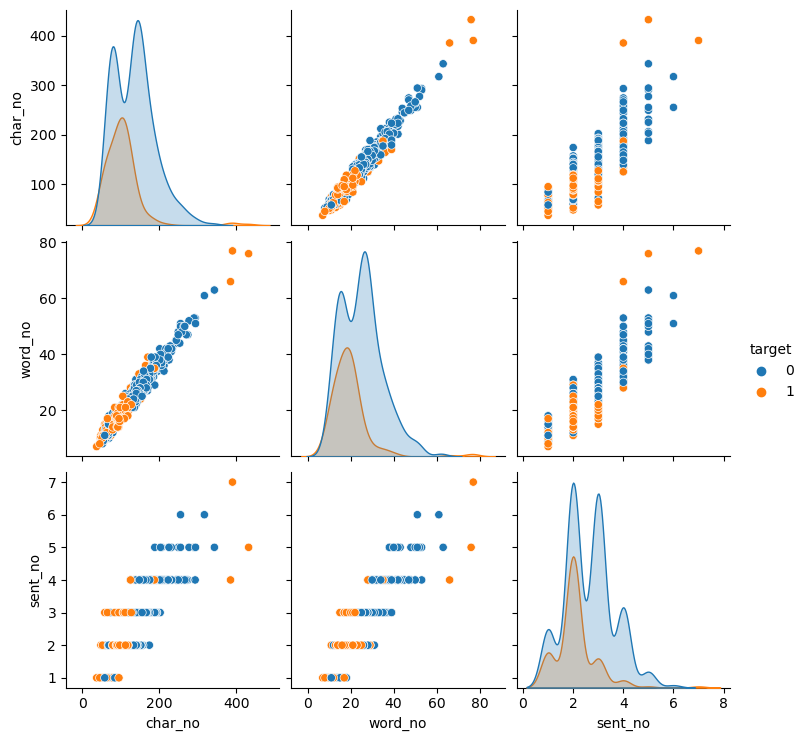

In [31]:
# co-relation of no. of character, no. of words, no. of sentences
sns.pairplot(df, hue='target')

In [32]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,target,char_no,word_no,sent_no
target,1.000000,-0.252551,-0.252837,-0.252334
char_no,-0.252551,1.000000,0.981003,0.854763
word_no,-0.252837,0.981003,1.000000,0.884443
sent_no,-0.252334,0.854763,0.884443,1.000000


<Axes: >

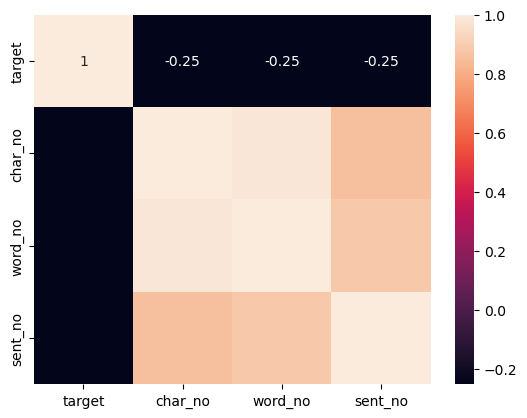

In [33]:
sns.heatmap(numeric_df.corr(), annot=True)

##### tells that relation betn chars, words and sentences is multi collinear

### Stage 3: Text Data Preprocessing
* Removing Unneccesary Characters like '\n'
* Lower Case
* Tokenisation
* Remove Special Characters
* REmove Stop Words
* Stemming

In [34]:
df['body'][0]

'Dear John, please find attached the quarterly financial report for review.'

In [35]:
# removing the '\n' from the msg body
df['body'] = df['body'].str.replace('\n', '', regex=False)
print('Removed backslash n from the messages')

Removed backslash n from the messages


C:\Users\bahad\AppData\Local\Temp\ipykernel_21720\3019244835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df['body'].str.replace('\n', '', regex=False)


In [36]:
# downloading and importing the stop words 
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bahad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
# stemming the words and create an object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print('Loaded the PorterStemmer')

Loaded the PorterStemmer


In [38]:
# function to take 5 further steps:
def text_transform(text):
#     to lowecase
    text = text.lower()
#     cut the sentences in words
    text = nltk.word_tokenize(text)
#     make a list and append only the apla-numeric characters in it(REMOVES THE SPECIAL CHARS)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
#     clone the list back in text
    text = y[:]
    y.clear()
    
#     remove stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in st.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
#     stemming the words
    for i in text:
        stemmed_word = ps.stem(i)
        y.append(stemmed_word)
        
#       return 'y' list in the form of a string
    return " ".join(y)

print('Function Defined Successfully')

Function Defined Successfully


In [39]:
text_transform('Dear John, please find attached the quarterly financial report for review.')

'dear john pleas find attach quarterli financi report review'

In [40]:
# preprocessing the texts in body
df['transformed_text'] = df['body'].apply(text_transform)
print('A new column created for Transformed Text')

A new column created for Transformed Text


C:\Users\bahad\AppData\Local\Temp\ipykernel_21720\3080310634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['body'].apply(text_transform)


In [41]:
df.head()

,target,body,char_no,word_no,sent_no,transformed_text
0,0,"Dear John, please find attached the quarterly ...",74,13,1,dear john pleas find attach quarterli financi ...
1,1,Congratulations! You've won a free trip to the...,87,19,3,congratul free trip bahama click claim prize
2,0,"Hi, I am having trouble with my account login....",69,16,2,hi troubl account login pleas assist
3,0,Please join us in welcoming our new team membe...,77,17,1,pleas join us welcom new team member sarah hr ...
4,1,Urgent: Your bank account has been compromised...,80,14,2,urgent bank account compromis verifi detail im...


### Creating A word Cloud for every class

In [42]:
# import worlcloud and create an object
from wordcloud import WordCloud
wc = WordCloud(width=400, height=400, min_font_size=10, background_color='white')
print('WordCloud Imported')

WordCloud Imported


Class 0 WordCloud Genereated


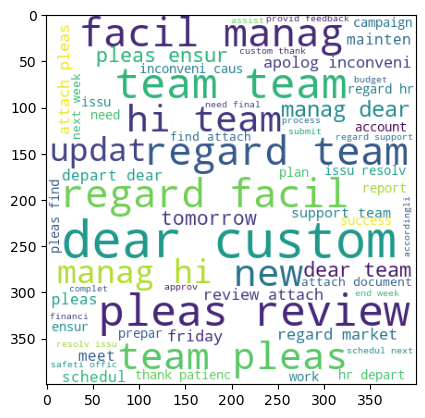

In [43]:
# wordcloud for target 0
aca_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))
print("Class 0 WordCloud Genereated")
plt.imshow(aca_wc)

Class 1 WordCloud Genereated


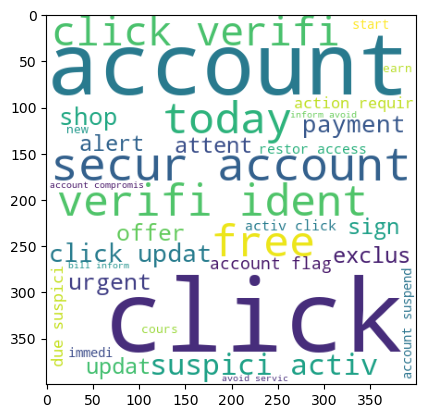

In [44]:
# wordcloud for target 1
fin_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))
print("Class 1 WordCloud Genereated")
plt.imshow(fin_wc)

# Pluck out the most used words used in a one type of the class

In [45]:
#importing the collections library 
from collections import Counter
print('Collections Counter imported Successfully')

Collections Counter imported Successfully


#### Class 0: most Words

In [46]:
# plucking out used words from class 0
class_0 = [] #empty list
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for words in msg.split():
        class_0.append(words)
        
print('Words spiltted, and added to a list')

Words spiltted, and added to a list


In [47]:
# creating a dataframe for most common words of class 0
class_0_df = pd.DataFrame(Counter(class_0).most_common(10))
print("Created a Dataframe for Class 0 common words")

Created a Dataframe for Class 0 common words


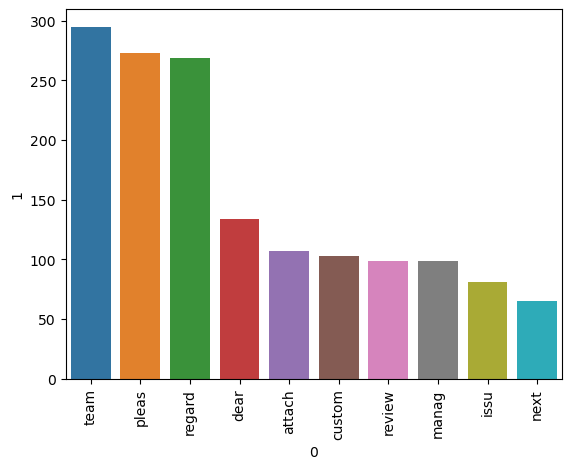

In [48]:
# plotting a bar graph to see the top 10 words of class 0
sns.barplot(x=class_0_df.columns[0], y=class_0_df.columns[1], data=class_0_df)
plt.xticks(rotation='vertical')
plt.show()

#### Class 1: most words

In [49]:
# plucking out used words in CLass 1
class_1 = [] # empty list
for msg in df[df['target']==1]['transformed_text'].to_list():
    for words in msg.split():
        class_1.append(words)
print('Words Splited, and added to a list')

Words Splited, and added to a list


In [50]:
# creating a dataframe for most used words in class 1
class_1_df = pd.DataFrame(Counter(class_1).most_common(10))
print("Created a DAtaframe for most used words of Class 2")

Created a DAtaframe for most used words of Class 2


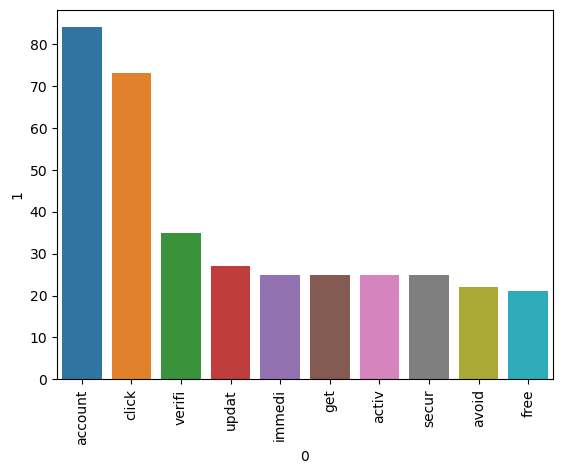

In [51]:
# plotting a barplot for most used words
sns.barplot(x=class_1_df[0], y = class_1_df[1], data=class_1_df)
plt.xticks(rotation='vertical')
plt.show()

# Stage 4: Model Building
* Naive Bayes Algorithm(usually best for text based Classification)

In [52]:
# import the vectoriser function from Scikit learn library and creating the object
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()
print('Vectoriser Imported')

Vectoriser Imported


In [53]:
# creating a matrix that would tell whether a word is present in a text or not

# first did it using CountVectoriser
# X = cv.fit_transform(df['transformed_text']).toarray()

# now using TfidfVectoriser
X = tfidf.fit_transform(df['transformed_text']).toarray()
print('Created a sprase matrix of transformed text column and converted it to an array')

Created a sprase matrix of transformed text column and converted it to an array


In [54]:
# this matrix tells that words in a column is present in a text of which of the rows in the current dataset
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
# (r = no of entries in the dataset(total emails), c = total number of words from all the dataset)
X.shape

(628, 925)

In [56]:
# taking all the types of emails into an array
y = df['target'].values
print(f'Classes of the emails are:  {y}')
y.shape

Classes of the emails are:  [0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0

(628,)

### Training the Model (Naive Bayes ALgorithm)

##### Requiring the Library

In [57]:
# importing the library for training
from sklearn.model_selection import train_test_split
print('Training Library imported')

Training Library imported


In [58]:
# requiring the different types of Naive Bayes Algorithms and creating their objects
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
print('Libraries Imported and Objects Created')

Libraries Imported and Objects Created


In [59]:
# importing metrics library
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print('Imported Metric libraries')

Imported Metric libraries


##### Splitting

In [60]:
# spliting the content using train_test_split, test size is 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print('Splitting of the Contents DONE')

Splitting of the Contents DONE


##### Training : GNB

In [61]:
# training the model using GNB
gnb.fit(X_train, y_train)

# predict
y_pred1 = gnb.predict(X_test)

# print the scores
print('Accuracy: ', accuracy_score(y_test, y_pred1))
print('CF: \n', confusion_matrix(y_test, y_pred1))
print('Precision: ', precision_score(y_test, y_pred1, average='weighted', zero_division=0))

Accuracy:  0.9761904761904762
CF: 
 [[92  2]
 [ 1 31]]
Precision:  0.9765861378764604


##### Training : MNB

In [62]:
# training using MNB
mnb.fit(X_train, y_train)

# predicting
y_pred2 = mnb.predict(X_test)

# metrics
print('Accuracy: ', accuracy_score(y_test, y_pred2))
print('CF: \n', confusion_matrix(y_test, y_pred2))
print('Precision: ', precision_score(y_test, y_pred2, average='weighted', zero_division=0))

Accuracy:  0.9603174603174603
CF: 
 [[93  1]
 [ 4 28]]
Precision:  0.9604782782884455


##### Training : BNB

In [63]:
# training using BNB
bnb.fit(X_train, y_train)

# predicting
y_pred3 = bnb.predict(X_test)

# metrics
print('Accuracy: ', accuracy_score(y_test, y_pred3))
print('CF: \n', confusion_matrix(y_test, y_pred3))
print('Precision: ', precision_score(y_test, y_pred3, average='weighted', zero_division=0))

Accuracy:  0.9682539682539683
CF: 
 [[91  3]
 [ 1 31]]
Precision:  0.9694819956968295


##### So far CountVectoriser gave the best Score by GausianNB
##### and TfidfVectoriser gave best Score by BernoulliNB

### Hence we go with TfidVectoriser -> GNB

### Compare with other models first

In [64]:
# imporing the models(classifiers) to compare our model 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
print('Imported the Models')

Imported the Models


In [65]:
# creating the object of the classifiers

bnb = BernoulliNB()
gnb = GaussianNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0)
print('Objects of the models(Classifiers) created')

Objects of the models(Classifiers) created


In [66]:
# create a dictionary for key and object name pair 

clf_dict = {
    'BNB' : bnb,
    'GNB' : gnb,
    'RF' : rf,
    'KNN' : knn,
    'SVC' : svc
}
print('Created a Dictionary of Model Names and Objects')

Created a Dictionary of Model Names and Objects


In [67]:
# create a function to train the models one by one
def train_clf(clf, X_train,X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return acc, pre

print('Created a function to train a Speccific Classfier')

Created a function to train a Speccific Classfier


In [68]:
# training the classifier using the func
train_clf(knn, X_train,X_test, y_train, y_test)

(0.9523809523809523, 0.9519841269841272)

In [69]:
# storing all acc and pre scores
acc_score = []
pre_score = []

# running a loop over the dictionary to get the scores for all the classfiers
for name, clf in clf_dict.items():
    
    curr_acc, curr_pre = train_clf(clf, X_train, X_test, y_train, y_test)
    
    print('For ', name)
    print('Accuracy', curr_acc)
    print('Precision', curr_pre)
    
    acc_score.append(curr_acc)
    pre_score.append(curr_pre)
    
print("DONE")

For  BNB
Accuracy 0.9682539682539683
Precision 0.9694819956968295
For  GNB
Accuracy 0.9761904761904762
Precision 0.9765861378764604
For  RF
Accuracy 0.9841269841269841
Precision 0.9841269841269841
For  KNN
Accuracy 0.9523809523809523
Precision 0.9519841269841272
For  SVC
Accuracy 0.9920634920634921
Precision 0.9921470342522974
DONE


In [70]:
# create a datafram for this
perform_df = pd.DataFrame({'Algorithm':clf_dict.keys(), 'Accuracy':acc_score, 'Precision':pre_score}).sort_values('Precision', ascending=False)
perform_df

,Algorithm,Accuracy,Precision
4,SVC,0.992063,0.992147
2,RF,0.984127,0.984127
1,GNB,0.976190,0.976586
0,BNB,0.968254,0.969482
3,KNN,0.952381,0.951984


In [71]:
# import pickle library to save vectorizer and model
import pickle

# Open files in write-binary mode and dump the objects
with open('vectoriser_ham_spam.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

with open('model_ham_spam.pkl', 'wb') as model_file:
    pickle.dump(gnb, model_file)

print('Vectorizer and Model PICKLE files created')


Vectorizer and Model PICKLE files created
